In [1]:
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
 # Loads an image
src = cv.imread("../Gauge/frames/Straight_Offset_notMoving2/frame0.jpg", cv.IMREAD_COLOR)

In [3]:
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

In [4]:
gray = cv.GaussianBlur(gray,(5,5),cv.BORDER_DEFAULT)

In [5]:
gray = cv.medianBlur(gray,5)

In [6]:
gray = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,3.5)

In [7]:
kernel = np.ones((3,3),np.uint8)
gray = cv.erode(gray,kernel,iterations = 1)
# gray = erosion

In [8]:
gray = cv.dilate(gray,kernel,iterations = 1)
# gray = dilation

In [9]:
height, width = gray.shape[:2]

In [24]:
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 25,np.array([]), param1=100, param2=50, minRadius=int(height*0.35), maxRadius=int(height*0.50))

In [11]:
def avg_circles(circles, b):
    avg_x=0
    avg_y=0
    avg_r=0
    for i in range(b):
        #optional - average for multiple circles (can happen when a gauge is at a slight angle)
        avg_x = avg_x + circles[0][i][0]
        avg_y = avg_y + circles[0][i][1]
        avg_r = avg_r + circles[0][i][2]
    avg_x = int(avg_x/(b))
    avg_y = int(avg_y/(b))
    avg_r = int(avg_r/(b))
    return avg_x, avg_y, avg_r

In [12]:
if circles is  None:
    print ('no circle')

In [13]:
circles = np.uint16(np.around(circles))

In [14]:
circles.shape

(1, 42, 3)

In [15]:
a, b, c = circles.shape
x,y,r = avg_circles(circles, b)

In [17]:
cv.circle(src, (x, y), r, (255, 0, 0), 3, cv.LINE_AA)  # draw circle
cv.circle(src, (x, y), 2, (255, 0, 0), 3, cv.LINE_AA)  # draw center of circle

array([[[ 45,  54,  58],
        [ 45,  54,  58],
        [ 45,  54,  58],
        ...,
        [209, 233, 245],
        [209, 233, 245],
        [209, 233, 245]],

       [[ 45,  54,  58],
        [ 45,  54,  58],
        [ 45,  54,  58],
        ...,
        [209, 233, 245],
        [209, 233, 245],
        [209, 233, 245]],

       [[ 45,  54,  58],
        [ 45,  54,  58],
        [ 45,  54,  58],
        ...,
        [209, 233, 245],
        [209, 233, 245],
        [209, 233, 245]],

       ...,

       [[ 26,  22,  28],
        [ 26,  22,  28],
        [ 26,  22,  28],
        ...,
        [ 83, 110, 167],
        [ 83, 110, 167],
        [ 83, 110, 167]],

       [[ 26,  22,  28],
        [ 26,  22,  28],
        [ 26,  22,  28],
        ...,
        [ 82, 111, 168],
        [ 82, 111, 168],
        [ 82, 111, 168]],

       [[ 26,  22,  28],
        [ 26,  22,  28],
        [ 26,  22,  28],
        ...,
        [ 82, 111, 168],
        [ 82, 111, 168],
        [ 82, 111, 168]]

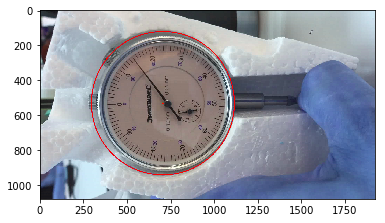

In [18]:
plt.imshow(src)

In [22]:
import math

In [23]:

x1= 0
x2 = 0
y1 = 2 
y2 = -2

In [24]:
dot = x1*x2 + y1*y2      # dot product
det = x1*y2 - y1*x2      # determinant
angle = math.atan2(det, dot)  # atan2(y, x) or atan2(sin, cos)

In [25]:
print(angle)

3.141592653589793


In [26]:
v = [0,2]
v1 = [0,-2]

In [27]:
dot = np.dot(v, v1)

In [28]:
print(dot)

-4


In [29]:
a = np.array([[0, 2], [0, -2]])

In [30]:
print(a)

[[ 0  2]
 [ 0 -2]]


In [31]:
det

0

In [33]:
from math import atan2,degrees

def GetAngleOfLineBetweenTwoPoints(p1, p2):
    xDiff = p2.x - p1.x
    yDiff = p2.y - p1.y
    return degrees(atan2(yDiff, xDiff))

In [19]:
lineing = src.copy()

In [20]:

edges = cv.Canny(lineing,50,150,apertureSize = 3)
minLineLength = 500
maxLineGap = 40
lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    #cv.line(lineing, (x2,y2), (x, y), (0,255,0), 2,3)            
    cv.line(lineing,(x1,y1),(x2,y2),(255,255,0),1,4)
#for n in range(len(lines)):
#        for x1,y1,x2,y2 in lines[n]:
#            cv.line(lineing,(x1,y1),(x2,y2),(0,255,0),1,4)

In [21]:
print(lines)

[[[ 641  409  690  472]]

 [[ 580  342  634  413]]

 [[1286  493 1407  493]]

 [[ 969  821 1009  781]]

 [[1216  473 1263  473]]

 [[ 726  244  726  202]]

 [[ 732  865  732  818]]]


In [37]:
lines[0]

array([[598, 355, 659, 432]], dtype=int32)

In [40]:
#print line
cv.line(lineing, (617,304), (x, y), (0,255,0), 2)

array([[[ 45,  54,  58],
        [ 45,  54,  58],
        [ 45,  54,  58],
        ...,
        [209, 233, 245],
        [209, 233, 245],
        [209, 233, 245]],

       [[ 45,  54,  58],
        [ 45,  54,  58],
        [ 45,  54,  58],
        ...,
        [209, 233, 245],
        [209, 233, 245],
        [209, 233, 245]],

       [[ 45,  54,  58],
        [ 45,  54,  58],
        [ 45,  54,  58],
        ...,
        [209, 233, 245],
        [209, 233, 245],
        [209, 233, 245]],

       ...,

       [[ 26,  22,  28],
        [ 26,  22,  28],
        [ 26,  22,  28],
        ...,
        [ 83, 110, 167],
        [ 83, 110, 167],
        [ 83, 110, 167]],

       [[ 26,  22,  28],
        [ 26,  22,  28],
        [ 26,  22,  28],
        ...,
        [ 82, 111, 168],
        [ 82, 111, 168],
        [ 82, 111, 168]],

       [[ 26,  22,  28],
        [ 26,  22,  28],
        [ 26,  22,  28],
        ...,
        [ 82, 111, 168],
        [ 82, 111, 168],
        [ 82, 111, 168]]

In [22]:
lines = cv.HoughLinesP(
    edges,
    rho=6,
    theta=np.pi / 60,
    threshold=160,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=25
)
print(lines)

[[[ 909  662  981  709]]

 [[ 597  355  729  518]]

 [[ 755  919  868  854]]

 ...

 [[1058  634 1099  629]]

 [[1507  400 1541  348]]

 [[ 775  324  827  341]]]


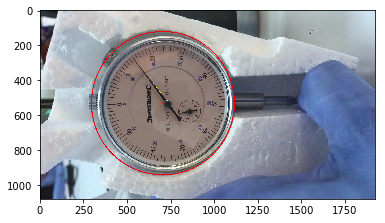

In [23]:
plt.imshow(lineing)


In [43]:
r

372

In [44]:
lines[0].size

4

In [ ]:
#P = d(B - A) + A
400()

In [46]:
import math

In [47]:
import math
dot = x1*x2 + y1*y2      # dot product
det = x1*y2 - y1*x2      # determinant
angle = math.atan2(det, dot)  # atan2(y, x) or atan2(sin, cos)

In [48]:
angle

0.0445250449346939

In [49]:
Hline = src

In [53]:

edges = cv.Canny(gray,50,150,apertureSize = 3)

lines = cv.HoughLines(edges,1,np.pi/180,140)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv.line(Hline,(x1,y1),(x2,y2),(255,0,0),2)

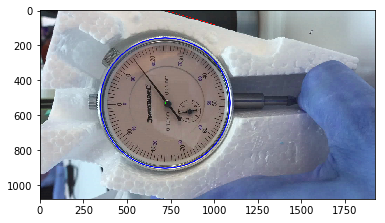

In [54]:
plt.imshow(Hline)


In [55]:
x1,y1,x2,y2

(-907, -464, 1015, 87)

In [56]:
import arcpy
import math
def GetAngle (p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    dX = x2 - x1
    dY = y2 - y1
    rads = math.atan2 (-dY, dX) #wrong for finding angle/declination?
    return math.degrees (rads)

ModuleNotFoundError: No module named 'arcpy'

In [57]:
def LineToXYs (line): #return first and last coordinates
    firstX, firstY = (line.firstPoint.X, line.firstPoint.Y)
    lastX, lastY = (line.lastPoint.X, line.lastPoint.Y)
    return [(firstX, firstY), (lastX, lastY)]

In [58]:
line1StPnt, line1EndPnt = LineToXYs (lines[0])

AttributeError: 'numpy.ndarray' object has no attribute 'firstPoint'

In [59]:
dx = x2 - x1
dy = y2 - y1


In [ ]:
myradians = math.atan2(dy, dx)

In [ ]:
angle = ( math.degrees(myradians))
angle

In [ ]:
if angle < 0:
    angle += 360
mm = angle * (-5.0/18.0) + 125.0
if mm >= 100:
    mm = abs(mm - 100)

print(mm)

In [ ]:
17.21967313666282 + 65

In [ ]:
if(angle<0) angle+=360;
    double mm = angle * (-5.0/18.0) + 125.0;
    if(mm>=100) {
        mm = abs(mm - 100);
    }